### Analysis of Variance

Analysis of variance between the acquisition years, method, and integrity measure outputs. 


Feature: $\mathcal{WT}$

Year vs $\mathcal{WT}$ (logistic regression ANOVA):
  LR stat=0.968, df=2.0, p-value=0.6162
Method vs $\mathcal{WT}$ (logistic regression ANOVA):
  LR stat=0.929, df=2.0, p-value=0.6286


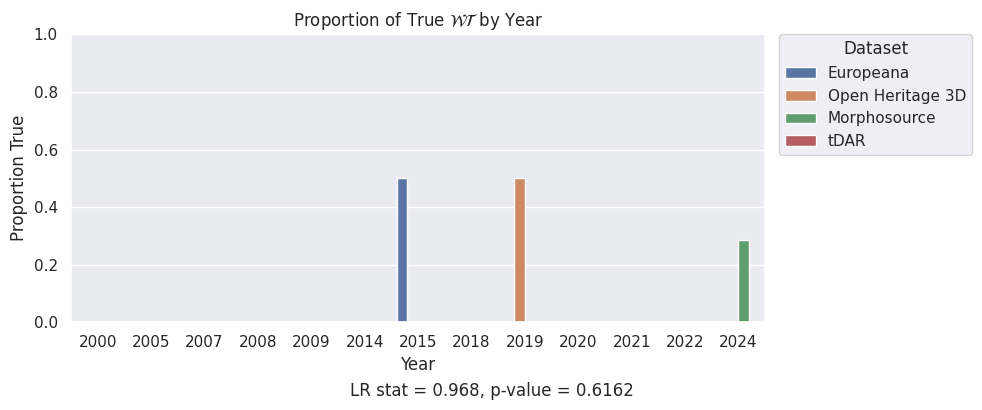

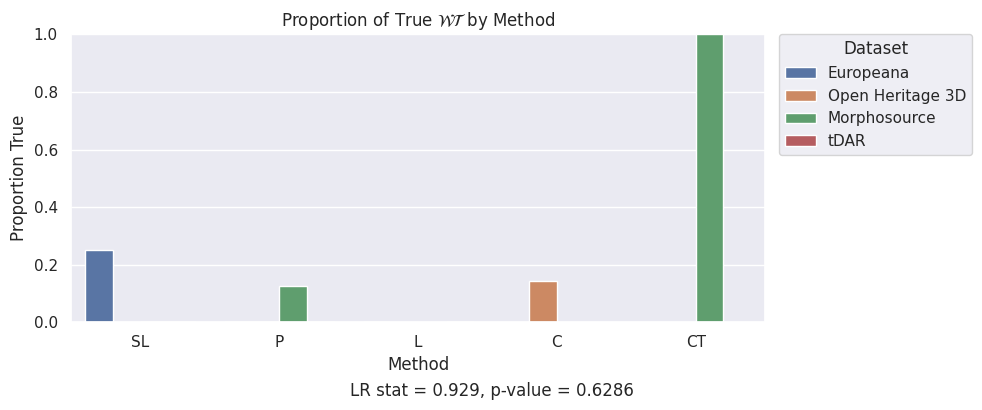


Feature: $\mathcal{O}$

Year vs $\mathcal{O}$: Model failed (Singular matrix)
Method vs $\mathcal{O}$ (logistic regression ANOVA):
  LR stat=3.635, df=2.0, p-value=0.1624


/tmp/ipykernel_47064/1576482740.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variation_check = df.groupby('Year')['Characteristic_bin'].nunique()


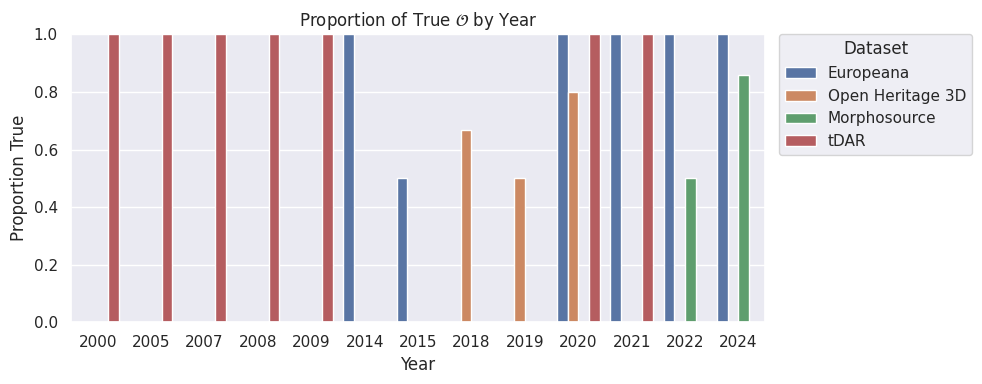

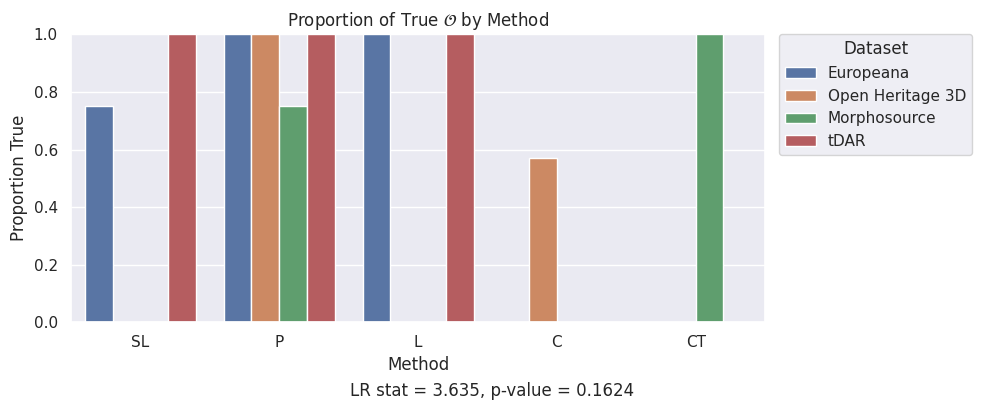


Feature: $\mathcal{M}_v$

Year vs $\mathcal{M}_v$: Model failed (Singular matrix)
Method vs $\mathcal{M}_v$ (logistic regression ANOVA):
  LR stat=2.178, df=3.0, p-value=0.5362


/tmp/ipykernel_47064/1576482740.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variation_check = df.groupby('Year')['Characteristic_bin'].nunique()


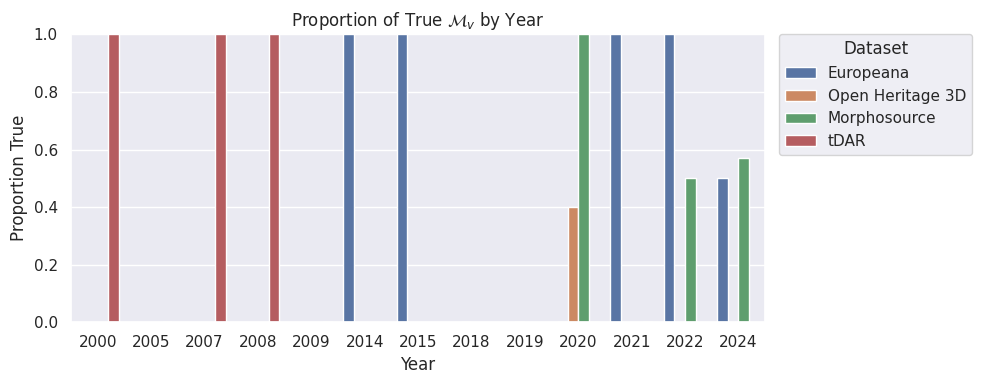

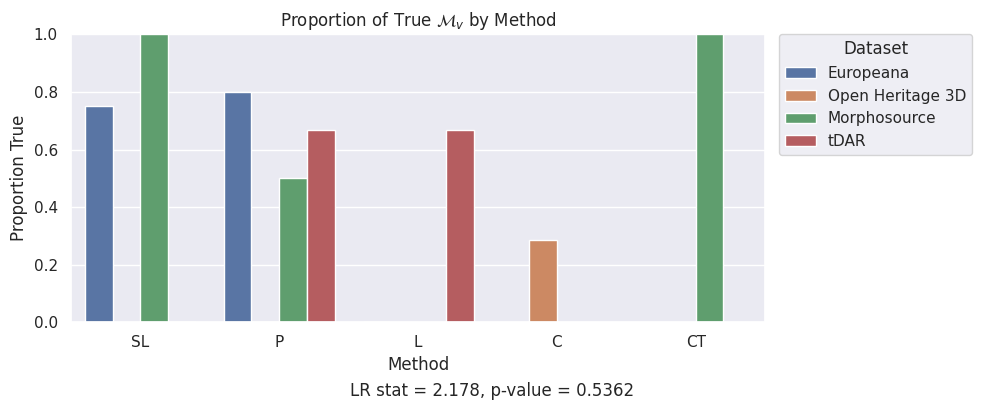


Feature: $\mathcal{M}_e$

Year vs $\mathcal{M}_e$: Model failed (Singular matrix)
Method vs $\mathcal{M}_e$ (logistic regression ANOVA):
  LR stat=3.635, df=2.0, p-value=0.1624


/tmp/ipykernel_47064/1576482740.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variation_check = df.groupby('Year')['Characteristic_bin'].nunique()


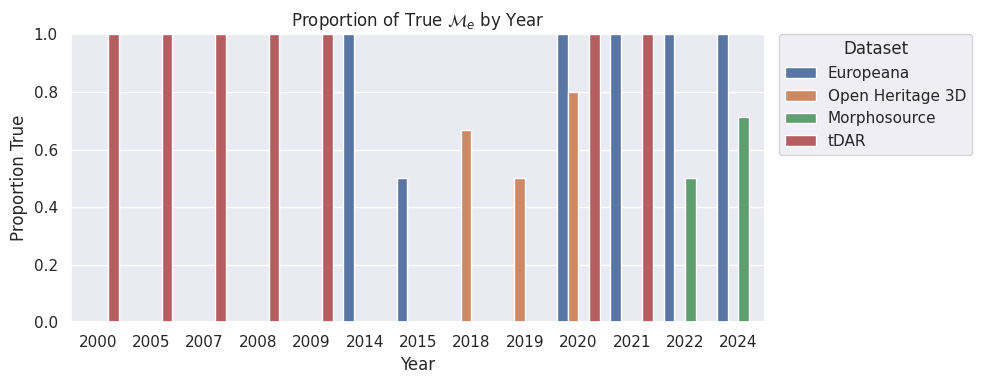

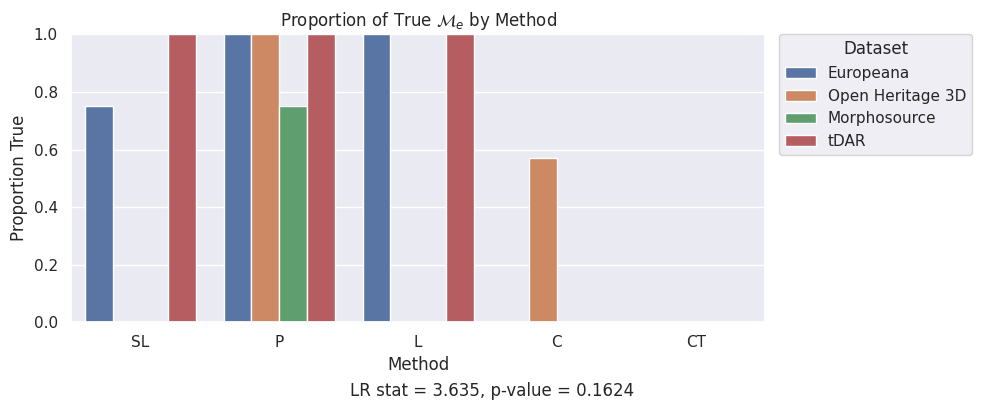


Feature: $\mathcal{M}_f$

Year vs $\mathcal{M}_f$: Model failed (Singular matrix)
Method vs $\mathcal{M}_f$ (logistic regression ANOVA):
  LR stat=0.696, df=1.0, p-value=0.4040


/tmp/ipykernel_47064/1576482740.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variation_check = df.groupby('Year')['Characteristic_bin'].nunique()


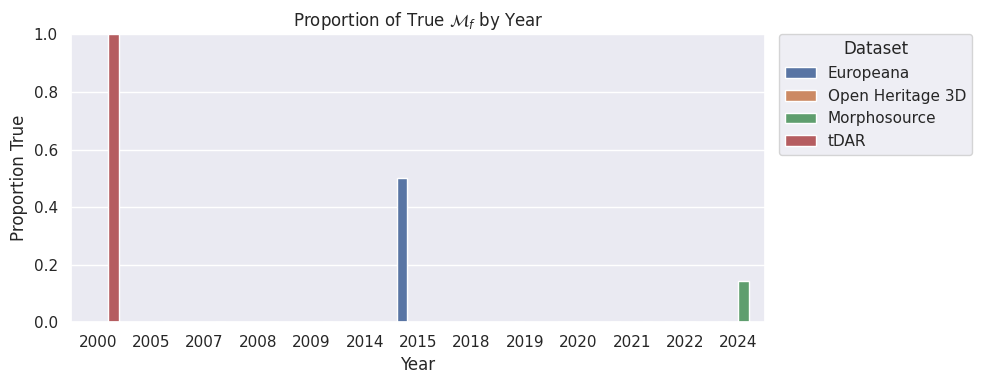

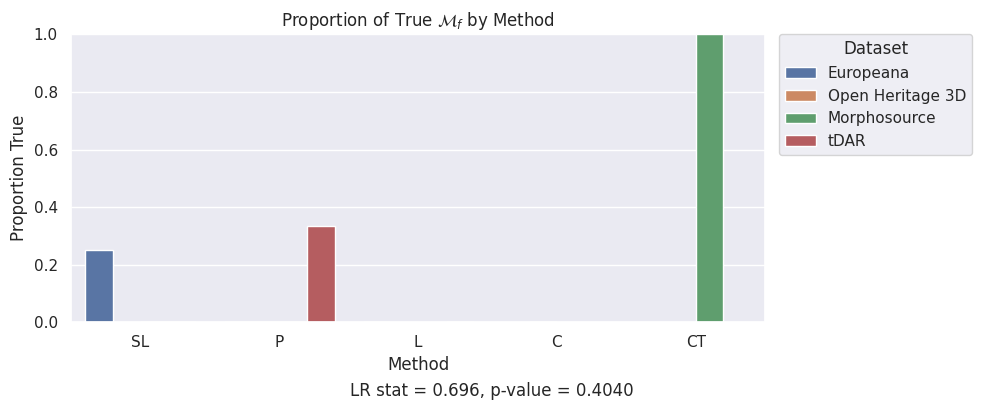

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme()
output_dir = "/home/markus/Downloads/arch_plots_extra"
os.makedirs(output_dir, exist_ok=True)

# --- Your data ---
data1 = {
    'Dataset': ['Europeana']*10,
    'Object Name': ['Obj1', 'Obj2', 'Obj3', 'Obj4', 'Obj5', 'Obj6', 'Obj7', 'Obj8', 'Obj9', 'Obj10'],
    'Year': ['2015', '2020', '2014', '2024', '2024', '2015', '2022', '2021', '2021', '2020'],
    'Method': ['SL', 'P', 'P', 'L', 'P', 'SL', 'P', 'P', 'SL', 'SL'],
    '$\mathcal{WT}$': [True, False, False, False, False, False, False, False, False, False],
    '$\mathcal{O}$': [True, True, True, True, True, False, True, True, True, True],
    '$\mathcal{M}_v$': [True, False, True, False, True, True, True, True, True, False],
    '$\mathcal{M}_e$': [True, True, True, True, True, False, True, True, True, True],
    '$\mathcal{M}_f$': [True, False, False, False, False, False, False, False, False, False]
}
data2 = {
    'Dataset': ['Open Heritage 3D']*10,
    'Object Name': ['Obj11', 'Obj12', 'Obj13', 'Obj14', 'Obj15', 'Obj16', 'Obj17', 'Obj18', 'Obj19', 'Obj20'],
    'Year': ['2019', '2019', '2020', '2018', '2020', '2020', '2020', '2018', '2020', '2018'],
    'Method': ['C', 'C', 'C', 'C', 'C', 'P', 'C', 'P', 'P', 'C'],
    '$\mathcal{WT}$': [True, False, False, False, False, False, False, False, False, False],
    '$\mathcal{O}$': [False, True, True, True, False, True, True, True, True, False],
    '$\mathcal{M}_v$': [False, False, True, False, False, False, True, False, False, False],
    '$\mathcal{M}_e$': [False, True, True, True, False, True, True, True, True, False],
    '$\mathcal{M}_f$': [False, False, False, False, False, False, False, False, False, False]
}
data3 = {
    'Dataset': ['Morphosource']*10,
    'Object Name': ['Obj21', 'Obj22', 'Obj23', 'Obj24', 'Obj25', 'Obj26', 'Obj27', 'Obj28', 'Obj29', 'Obj30'],
    'Year': ['2022', '2024', '2020', '2024', '2024', '2024', '2024', '2024', '2024', '2022'],
    'Method': ['P', 'CT', 'SL', 'P', 'P', 'P', 'P', 'P', 'P', 'P'],
    '$\mathcal{WT}$': [False, True, False, False, False, False, False, True, False, False],
    '$\mathcal{O}$': [False, True, False, True, True, True, True, True, False, True],
    '$\mathcal{M}_v$': [False, True, True, False, False, False, True, True, True, True],
    '$\mathcal{M}_e$': [False, False, False, True, True, False, True, True, True, True],
    '$\mathcal{M}_f$': [False, True, False, False, False, False, False, False, False, False]
}
data4 = {
    'Dataset': ['tDAR']*10,
    'Object Name': ['Obj31', 'Obj32', 'Obj33', 'Obj34', 'Obj35', 'Obj36', 'Obj37', 'Obj38', 'Obj39', 'Obj40'],
    'Year': ['2005', '2000', '2007', '2007', '2009', '2008', '2021', '2020', '2008', '2008'],
    'Method': ['L', 'P', 'L', 'L', 'L', 'L', 'SL', 'P', 'L', 'P'],
    '$\mathcal{WT}$': [False, False, False, False, False, False, False, False, False, False],
    '$\mathcal{O}$': [True, True, True, True, True, True, True, True, True, True],
    '$\mathcal{M}_v$': [False, True, True, True, False, True, False, False, True, True],
    '$\mathcal{M}_e$': [True, True, True, True, True, True, True, True, True, True],
    '$\mathcal{M}_f$': [False, True, False, False, False, False, False, False, False, False]
}

# --- Combine all datasets ---
df = pd.concat([
    pd.DataFrame(data1),
    pd.DataFrame(data2),
    pd.DataFrame(data3),
    pd.DataFrame(data4)
], ignore_index=True)

char_cols = [col for col in df.columns if col.startswith('$')]

for char in char_cols:
    print(f"\n{'='*60}\nFeature: {char}\n{'='*60}")
    df['Characteristic_bin'] = df[char].map({True: 1, False: 0, 'True': 1, 'False': 0})

    # --- Logistic regression ANOVA for Year ---
    variation_check = df.groupby('Year')['Characteristic_bin'].nunique()
    valid_years = variation_check[variation_check > 1].index.tolist()
    df_year = df[df['Year'].isin(valid_years)]
    lr_stat_year = pval_year = None
    year_annotation = ""
    if len(valid_years) >= 2:
        try:
            model_year = logit('Characteristic_bin ~ C(Year)', data=df_year).fit(disp=0)
            model_year_null = logit('Characteristic_bin ~ 1', data=df_year).fit(disp=0)
            lr_stat_year = 2 * (model_year.llf - model_year_null.llf)
            df_year_model = model_year.df_model
            pval_year = stats.chi2.sf(lr_stat_year, df_year_model)
            print(f"\nYear vs {char} (logistic regression ANOVA):")
            print(f"  LR stat={lr_stat_year:.3f}, df={df_year_model}, p-value={pval_year:.4f}")
            year_annotation = f"LR stat = {lr_stat_year:.3f}, p-value = {pval_year:.4f}"
        except Exception as e:
            print(f"\nYear vs {char}: Model failed ({e})")
            year_annotation = "Not enough variation for ANOVA"
    else:
        print(f"\nYear vs {char}: Not enough variation for ANOVA.")
        year_annotation = "Not enough variation for ANOVA"

    # --- Logistic regression ANOVA for Method ---
    variation_check_method = df.groupby('Method')['Characteristic_bin'].nunique()
    valid_methods = variation_check_method[variation_check_method > 1].index.tolist()
    df_method = df[df['Method'].isin(valid_methods)]
    lr_stat_method = pval_method = None
    method_annotation = ""
    if len(valid_methods) >= 2:
        try:
            model_method = logit('Characteristic_bin ~ C(Method)', data=df_method).fit(disp=0)
            model_method_null = logit('Characteristic_bin ~ 1', data=df_method).fit(disp=0)
            lr_stat_method = 2 * (model_method.llf - model_method_null.llf)
            df_method_model = model_method.df_model
            pval_method = stats.chi2.sf(lr_stat_method, df_method_model)
            print(f"Method vs {char} (logistic regression ANOVA):")
            print(f"  LR stat={lr_stat_method:.3f}, df={df_method_model}, p-value={pval_method:.4f}")
            method_annotation = f"LR stat = {lr_stat_method:.3f}, p-value = {pval_method:.4f}"
        except Exception as e:
            print(f"Method vs {char}: Model failed ({e})")
            method_annotation = "Not enough variation for ANOVA"
    else:
        print(f"Method vs {char}: Not enough variation for ANOVA.")
        method_annotation = "Not enough variation for ANOVA"

    # --- Ensure 'Year' is ordered for plotting ---
    ordered_years = sorted(set(df['Year']))
    df['Year'] = pd.Categorical(df['Year'], categories=ordered_years, ordered=True)

    # --- Combined plot by Year, colored by Dataset ---
    plt.figure(figsize=(10, 4))
    sns.barplot(x='Year', y='Characteristic_bin', hue='Dataset', data=df, errorbar=None)
    plt.title(f'Proportion of True {char} by Year')
    plt.ylabel('Proportion True')
    plt.ylim(0, 1)
    plt.legend(title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.subplots_adjust(bottom=0.18)  # Increase bottom margin to fit annotation
    plt.figtext(0.5, 0.02, year_annotation, ha='center', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{char}_by_year.svg"), format="svg", bbox_inches='tight')
    plt.show()

    # --- Combined plot by Method, colored by Dataset ---
    plt.figure(figsize=(10, 4))
    sns.barplot(x='Method', y='Characteristic_bin', hue='Dataset', data=df, errorbar=None)
    plt.title(f'Proportion of True {char} by Method')
    plt.ylabel('Proportion True')
    plt.ylim(0, 1)
    plt.legend(title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.subplots_adjust(bottom=0.18)
    plt.figtext(0.5, 0.02, method_annotation, ha='center', fontsize=12)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{char}_by_method.svg"), format="svg", bbox_inches='tight')
    plt.show()
